# Exploratory Data Analysis

In this step, we will perform data annotation, quality control, and normalization. Once the data is ready for analysis, we will perform cluster analysis to identify unique macrophage populations and differential expression analysis to find the up- and down-regulated expression genes in each cluster.

Since we only focus on studying the alteration macrophage spots within lung tissue, we will remove the upper airway spots of Vaped Female lung to mitigate potential bias related to lung tissue types.

In [7]:
import anndata as ad
import numpy as np

In [10]:
# Custom Plotting functions
import plot_st

In [3]:
# Read the data
root_dir = '/Users/anhnguyen/Documents/My_Projects/ST_Data_Analysis/'

adata_dir = root_dir + 'Raw_Initial_Data/'
adata_M24 = ad.read_h5ad(adata_dir + 'raw_M24.h5ad')
adata_F31 = ad.read_h5ad(adata_dir + 'raw_F31.h5ad')
adata_M63 = ad.read_h5ad(adata_dir + 'raw_M63.h5ad')
adata_F62 = ad.read_h5ad(adata_dir + 'raw_F62.h5ad')

In [4]:
# Guestimate the line which separate the upper airway and lung tissues.
def line(x):
  return -0.6 * x + 6900

In [5]:
distance = adata_F31.obsm['spatial'][:,1] - line(adata_F31.obsm['spatial'][:,0])
adata_F31 = adata_F31[distance < 0]
adata_F31.write_h5ad(adata_dir + 'no_airway_F31.h5ad')

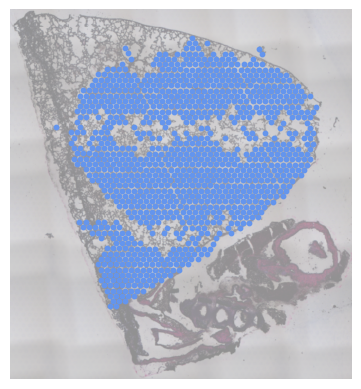

In [6]:
plot_st.spatial(adata_F31)

## Macrophage Identification

The identification of spots containing macrophage cells is identified based on
the level expression of macrophage biomarkers such as *Cd14* , *Cd68*, or
*Adgre1*. We will build a function to annotate macrophage spots and plot them as green spot, where non-macrophage spots are in cornflowerblue.

We will also save the macrophage spots to a new data containers.

In [21]:
def create_macrophage_adata (adata):
    macrophage_markers = ['Cd14', 'Cd68', 'Adgre1']
    mask1 = np.isin(adata.var_names, macrophage_markers)
    total_counts = np.array(adata.X[:, mask1].sum(axis=1))
    mask = (total_counts > 0)

    macrophage_adata = ad.AnnData(adata[mask].X)
    macrophage_adata.obs_names = adata[mask].obs_names
    macrophage_adata.var_names = adata[mask].var_names
    macrophage_adata.obsm['spatial'] = adata[mask].obsm['spatial']
    macrophage_adata.uns['extent'] = adata.uns['extent']
    macrophage_adata.uns['lung_image'] = adata.uns['lung_image']

    return macrophage_adata

In [18]:
macrophage_dir = 'results/macrophage_data/'

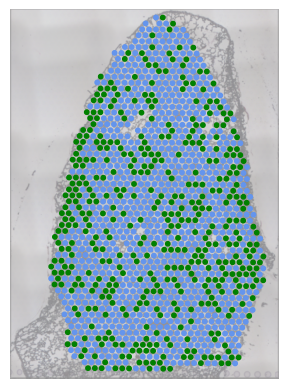

In [23]:
macrophage_M24 = create_macrophage_adata(adata_M24)
macrophage_M24.write_h5ad(root_dir + macrophage_dir + 'macrophage_M24.h5ad')
plot_st.spatial_macrophage(adata_M24)

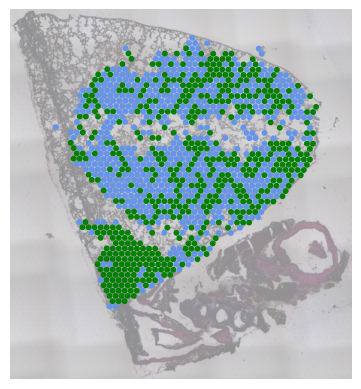

In [24]:
macrophage_F31 = create_macrophage_adata(adata_F31)
macrophage_F31.write_h5ad(root_dir + macrophage_dir + 'macrophage_F31.h5ad')
plot_st.spatial_macrophage(adata_F31)

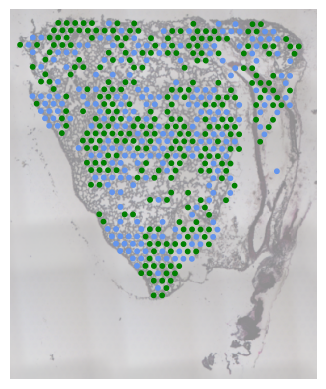

In [25]:
macrophage_M63 = create_macrophage_adata(adata_M63)
macrophage_M63.write_h5ad(root_dir + macrophage_dir + 'macrophage_M63.h5ad')
plot_st.spatial_macrophage(adata_M63)

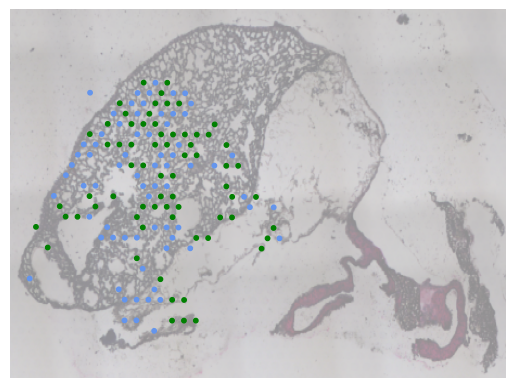

In [26]:
macrophage_F62 = create_macrophage_adata(adata_F62)
macrophage_F62.write_h5ad(root_dir + macrophage_dir + 'macrophage_F62.h5ad')
plot_st.spatial_macrophage(adata_F62)